In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
housing_prices = pd.read_csv('/content/drive/MyDrive/DONE/Housing/Melbourne_housing_FULL.csv')

# Pre Processing Data

In [9]:
housing_prices

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0



### **Categorical Variables**  
Based on the information below, the following variables: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname' will need to be specified as categories rather than general objects.   

In addition, the Date variable will need to be converted to a date object.

In [10]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [11]:
print(housing_prices.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [12]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    housing_prices[colname] = housing_prices[colname].astype('category')

In [13]:
housing_prices['Date'] = pd.to_datetime(housing_prices['Date'], format='%d/%m/%Y')

### **Numeric Variables**
A statistical summary of the numeric variables above indicates that Postcode is being treated as numeric when it should be identified as categorical.  This feature will need to be converted to the correct data type.

In [14]:
housing_prices.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Rooms,34857.0,3.031012,1.0,2.0,3.0,4.0,16.0,0.969933
Price,27247.0,1050173.344955,85000.0,635000.0,870000.0,1295000.0,11200000.0,641467.130105
Date,34857,2017-05-23 11:01:38.838109696,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,34856.0,11.184929,0.0,6.4,10.3,14.0,48.1,6.788892
Postcode,34856.0,3116.062859,3000.0,3051.0,3103.0,3156.0,3978.0,109.023903
Bedroom2,26640.0,3.084647,0.0,2.0,3.0,4.0,30.0,0.98069
Bathroom,26631.0,1.624798,0.0,1.0,2.0,2.0,12.0,0.724212
Car,26129.0,1.728845,0.0,1.0,2.0,2.0,26.0,1.010771
Landsize,23047.0,593.598993,0.0,224.0,521.0,670.0,433014.0,3398.841946
BuildingArea,13742.0,160.2564,0.0,102.0,136.0,188.0,44515.0,401.26706


In [15]:
# Convert numeric variables to categorical
num_cats = ['Postcode']

for colname in num_cats:
    housing_prices[colname] = housing_prices[colname].astype('category')

# Confirm changes
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

### Duplicate Variables
According to dataset documentation, 'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has, but reported from different sources. I will investigate these columns further to determine if one should be removed from the dataset.  

In [16]:
housing_prices['Rooms v Bedroom2'] = housing_prices['Rooms'] - housing_prices['Bedroom2']
housing_prices

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,0.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,0.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,0.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


The differences between these variables are minimal so keeping both would only be duplicating information.  Thus, the Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.  

In [17]:
housing_prices = housing_prices.drop(['Bedroom2','Rooms v Bedroom2'], axis=1)

### **Feature Engineering**
The dataset contains the year the home was built. Although this is being measured by the specific year, what this variable is really probing is the age of the home.  As such, home age can be expressed in terms of historic (greater than 50 years old) vs non-historic (less than 50 years old) to get the heart of this information in a more condensed way,  allowing for better analysis and visualization.  

In [18]:
housing_prices['Age'] = 2017 - housing_prices['YearBuilt']
housing_prices['Historic'] = np.where(housing_prices['Age']>=50,'Historic','Contemporary')
housing_prices['Historic'] = housing_prices['Historic'].astype('category')

In [19]:
housing_prices.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [20]:
housing_prices.isnull().sum()/len(housing_prices)*100

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,21.832057
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.002869
Postcode,0.002869


There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from the dataset.  

In [21]:
housing_prices = housing_prices.dropna()
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         8887 non-null   category      
 1   Address        8887 non-null   category      
 2   Rooms          8887 non-null   int64         
 3   Type           8887 non-null   category      
 4   Price          8887 non-null   float64       
 5   Method         8887 non-null   category      
 6   SellerG        8887 non-null   category      
 7   Date           8887 non-null   datetime64[ns]
 8   Distance       8887 non-null   float64       
 9   Postcode       8887 non-null   category      
 10  Bathroom       8887 non-null   float64       
 11  Car            8887 non-null   float64       
 12  Landsize       8887 non-null   float64       
 13  BuildingArea   8887 non-null   float64       
 14  YearBuilt      8887 non-null   float64       
 15  CouncilArea    8887 non-n

Data with a 'zero'  BuildingArea will be removed because it is not possible for a home to have a size of zero.

In [22]:
housing_prices = housing_prices[housing_prices['BuildingArea']!=0]

<ipython-input-23-607cd433b4c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_prices['Price'], kde = False,hist_kws=dict(edgecolor="k"))


<Axes: xlabel='Price'>

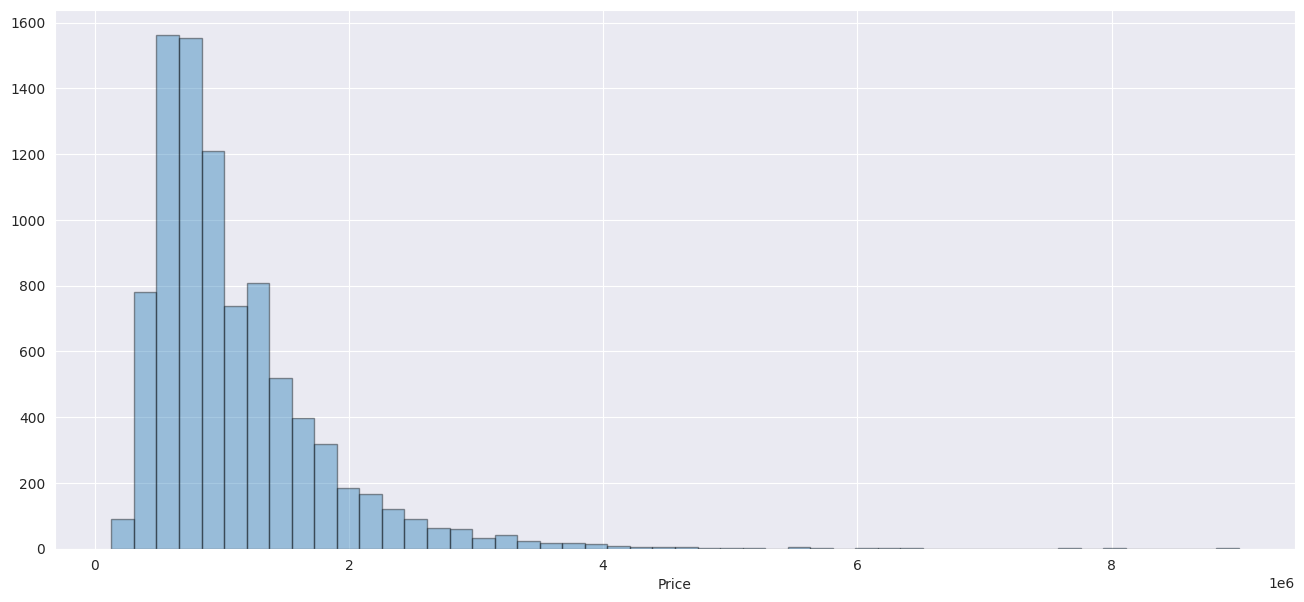

In [23]:
plt.figure(figsize=(16,7))
sns.distplot(housing_prices['Price'], kde = False,hist_kws=dict(edgecolor="k"))

In [24]:
housing_prices.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Historic'],
      dtype='object')

In [25]:
housing_prices['Regionname'] = housing_prices['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro',
                                            'Southern Metropolitan':'S Metro',
                                            'Eastern Metropolitan':'E Metro',
                                            'South-Eastern Metropolitan':'SE Metro',
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

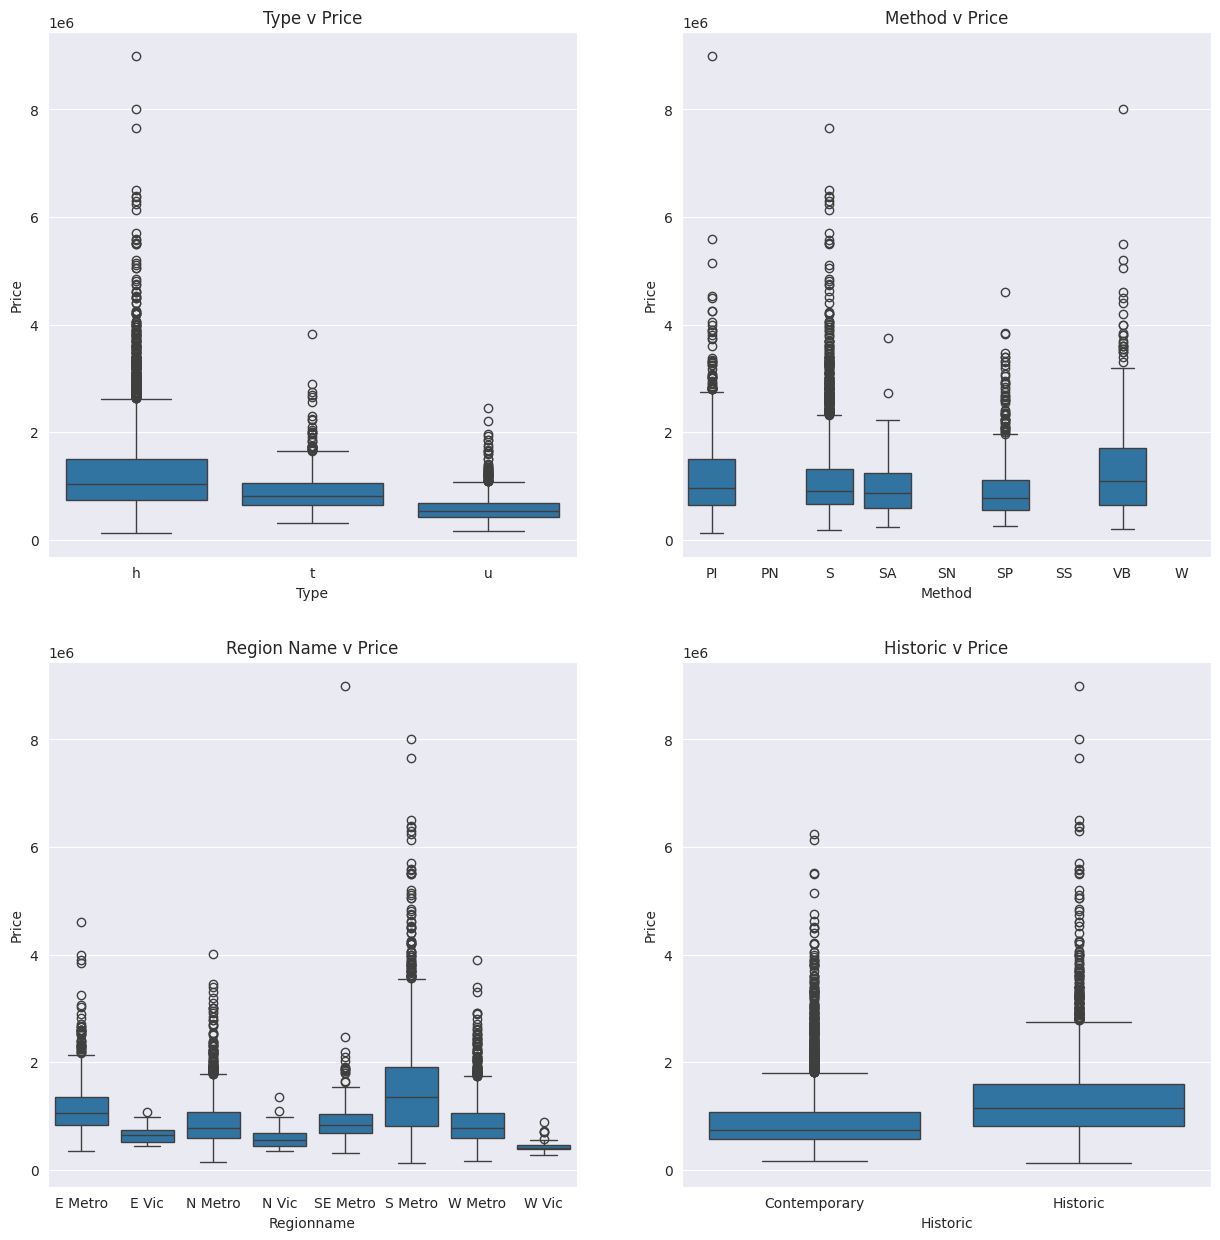

In [26]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

sns.boxplot(data = housing_prices, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

sns.boxplot(x = 'Method', y = 'Price', data = housing_prices, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
axes[0,1].set_title('Method v Price')

sns.boxplot(x = 'Regionname', y = 'Price', data = housing_prices, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
axes[1,0].set_title('Region Name v Price')

sns.boxplot(x = 'Historic', y = 'Price', data = housing_prices, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

### **Insights**
* Median prices for houses are over \$1M, townhomes are \$800k - \$900k and units are approx \$500k.    
* Home prices with different selling methods are relatively the same across the board.    
* Median prices in the Metropolitan Region are higher than than that of Victoria Region - with Southern Metro being the area with the highest median home price (~\$1.3M).  
* With an average price of $1M, historic homes (older than 50 years old) are valued much higher than newer homes in the area, but have more variation in price.    

### **Numeric Features**
Next, I visualize the relationships between numeric features in the dataset and price.  

In [27]:
housing_prices.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

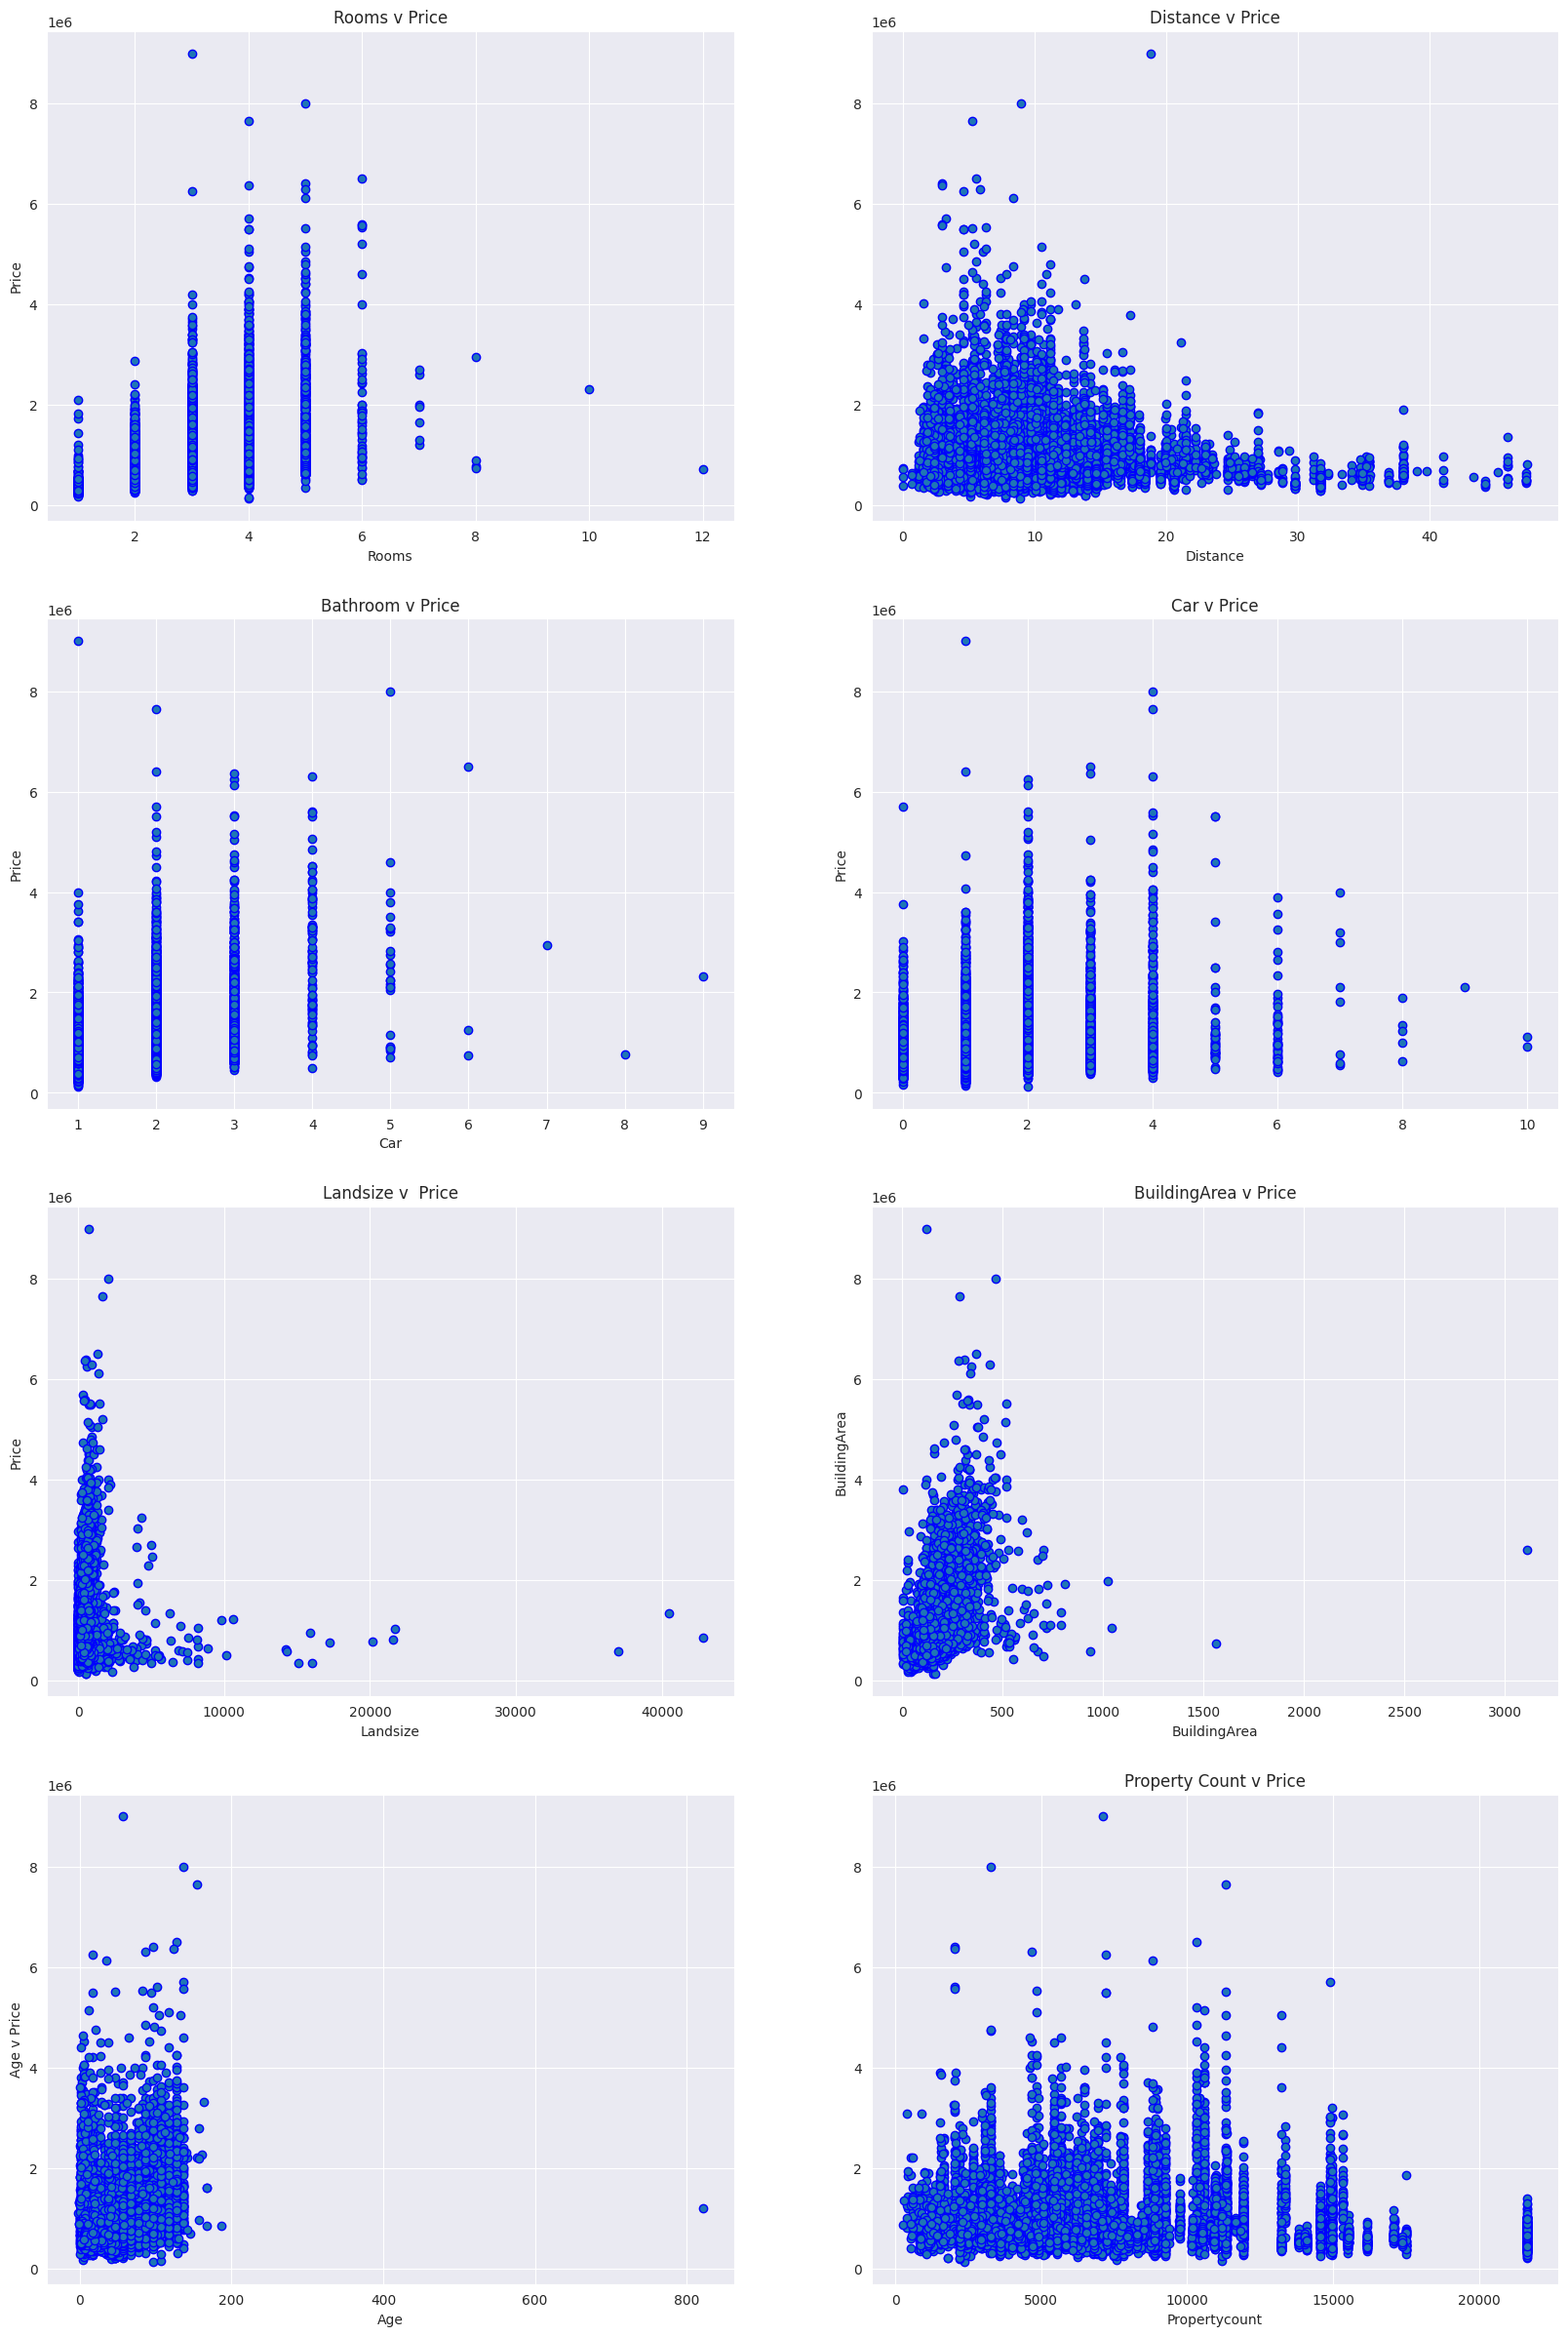

In [28]:

sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

axes[0,0].scatter(x = 'Rooms', y = 'Price', data = housing_prices, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

axes[0,1].scatter(x = 'Distance', y = 'Price', data = housing_prices, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_title('Distance v Price')

axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = housing_prices, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

axes[1,1].scatter(x = 'Car', y = 'Price', data = housing_prices, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

axes[2,0].scatter(x = 'Landsize', y = 'Price', data = housing_prices, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = housing_prices, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

axes[3,0].scatter(x = 'Age', y = 'Price', data = housing_prices, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = housing_prices, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
axes[3,1].set_title('Property Count v Price')

plt.show()

# **LINEAR REGRESSION**

In [29]:
housing_prices.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [32]:
# prompt: all columns

all_columns = housing_prices.columns.tolist()
all_columns

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'Age',
 'Historic']

Suburb Encoding Map:
 {'Abbotsford': 0, 'Aberfeldie': 1, 'Airport West': 2, 'Albanvale': 3, 'Albert Park': 4, 'Albion': 5, 'Alphington': 6, 'Altona': 7, 'Altona Meadows': 8, 'Altona North': 9, 'Ardeer': 10, 'Armadale': 11, 'Ascot Vale': 12, 'Ashburton': 13, 'Ashwood': 14, 'Aspendale': 15, 'Aspendale Gardens': 16, 'Attwood': 17, 'Avondale Heights': 18, 'Bacchus Marsh': 19, 'Balaclava': 20, 'Balwyn': 21, 'Balwyn North': 22, 'Bayswater': 23, 'Bayswater North': 24, 'Beaconsfield': 25, 'Beaconsfield Upper': 26, 'Beaumaris': 27, 'Bellfield': 28, 'Bentleigh': 29, 'Bentleigh East': 30, 'Berwick': 31, 'Black Rock': 32, 'Blackburn': 33, 'Blackburn North': 34, 'Blackburn South': 35, 'Bonbeach': 36, 'Boronia': 37, 'Botanic Ridge': 38, 'Box Hill': 39, 'Braybrook': 40, 'Briar Hill': 41, 'Brighton': 42, 'Brighton East': 43, 'Broadmeadows': 44, 'Brookfield': 45, 'Brooklyn': 46, 'Brunswick': 47, 'Brunswick East': 48, 'Brunswick West': 49, 'Bulleen': 50, 'Bullengarook': 51, 'Bundoora': 52, 'Burnley': 53

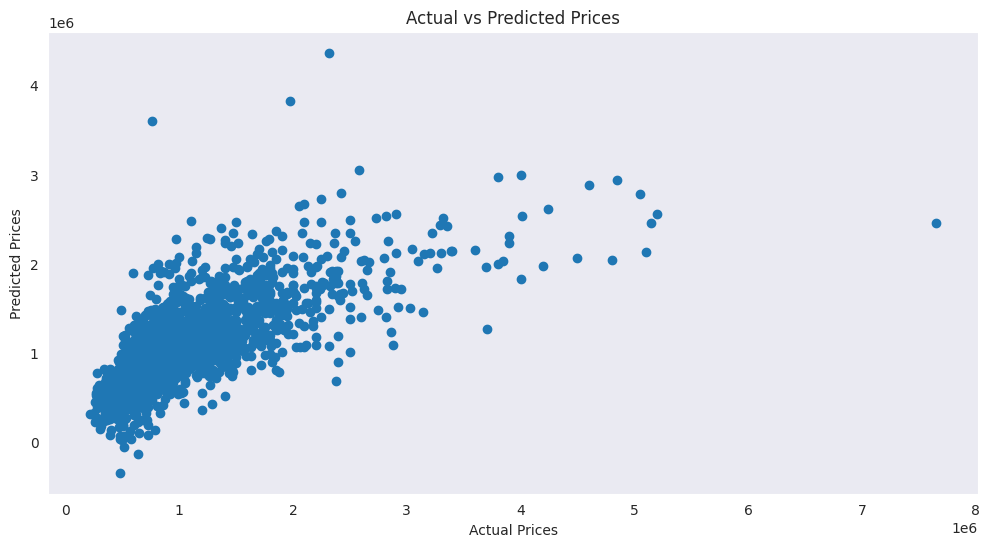

Residuals Distribution:


<ipython-input-41-74f84fd3ba4c>:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins=30)


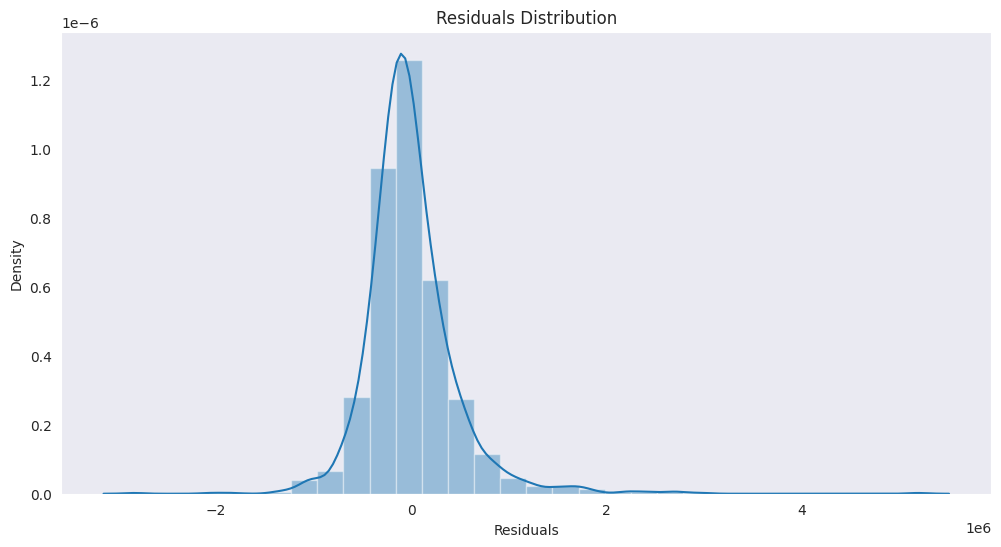

Residuals vs Fitted:


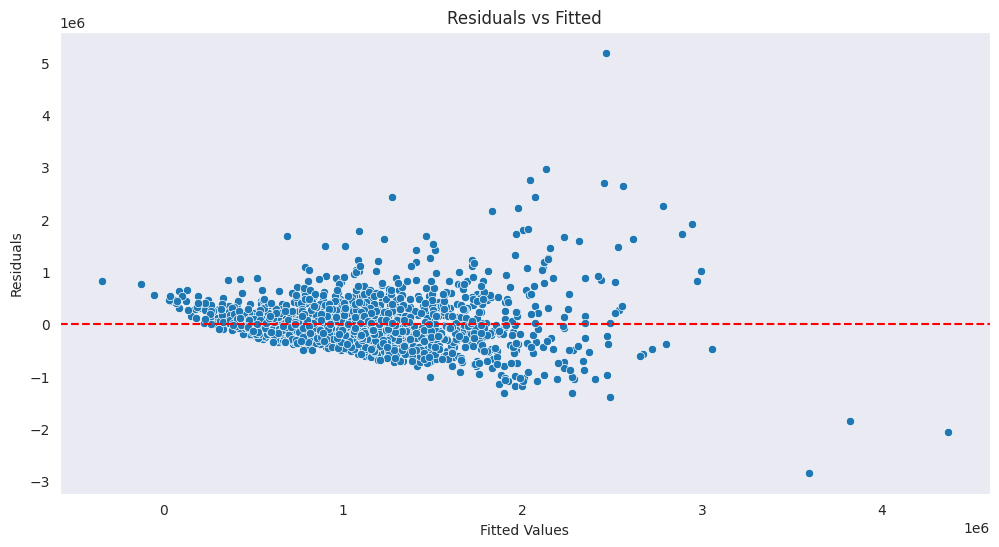

Prediction Error:


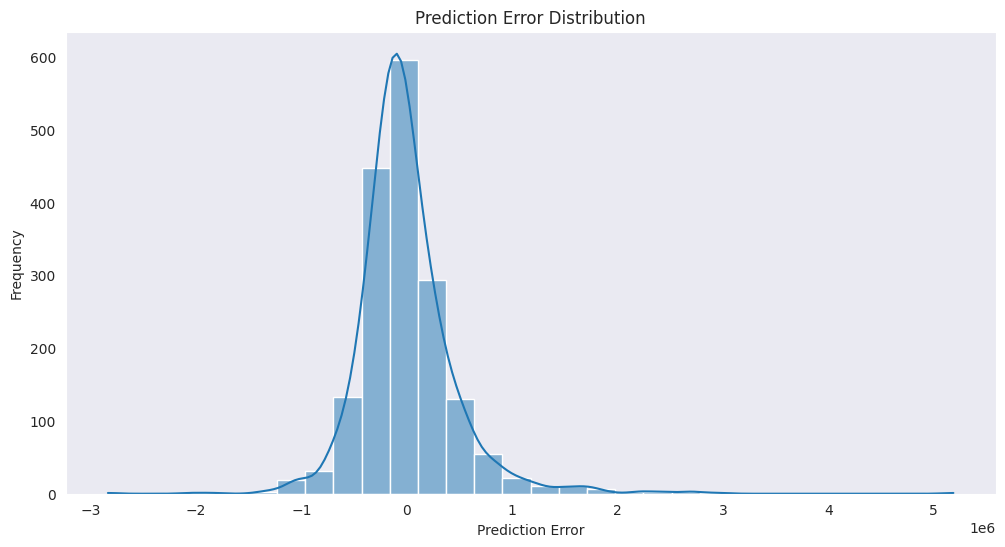

Feature Coefficients:
                  Coefficient
Rooms           132085.444471
Distance        -28450.144026
Bathroom        251927.481074
Car              49235.831277
Landsize            24.838003
BuildingArea      2134.766997
Propertycount        0.245924
Age               5437.671961
Suburb_Encoded    -612.392091


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Suburb' column
housing_prices['Suburb_Encoded'] = label_encoder.fit_transform(housing_prices['Suburb'])

# Create a dictionary that maps each suburb to its integer encoding
suburb_encoding_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Suburb Encoding Map:\n", suburb_encoding_map)

# Define X and y with the new encoded suburb column instead of one-hot columns
X = housing_prices[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Age', 'Suburb_Encoded']]

y = housing_prices['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 =', metrics.explained_variance_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

print('Residuals Distribution:')
plt.figure(figsize=(12, 6))
sns.distplot((y_test - y_pred), bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid()
plt.show()

print('Residuals vs Fitted:')
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=y_test - y_pred)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

print('Prediction Error:')
plt.figure(figsize=(12, 6))
sns.histplot((y_test - y_pred), bins=30, kde=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid()
plt.show()

print('Feature Coefficients:')
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


# Exporting the Model to .h5

In [43]:
import pickle

!mkdir -p '/content/drive/MyDrive/Housing/model'

model_path = '/content/drive/MyDrive/DONE/Housing/model/linear_regression_model.h5'
with open(model_path, 'wb') as f:
    pickle.dump(regressor, f)

print(f"Model saved to: {model_path}")


Model saved to: /content/drive/MyDrive/DONE/Housing/model/linear_regression_model.h5
